# Lab_Transformation & MODEL Fitting

## 1. Check if there are highly correlated features and drop them if there are any.
## 2. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).
## 3. for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [101]:
df_marketing = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')


df_marketing

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [102]:
df_numerical = df_marketing.select_dtypes(include=np.number)
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


<AxesSubplot:>

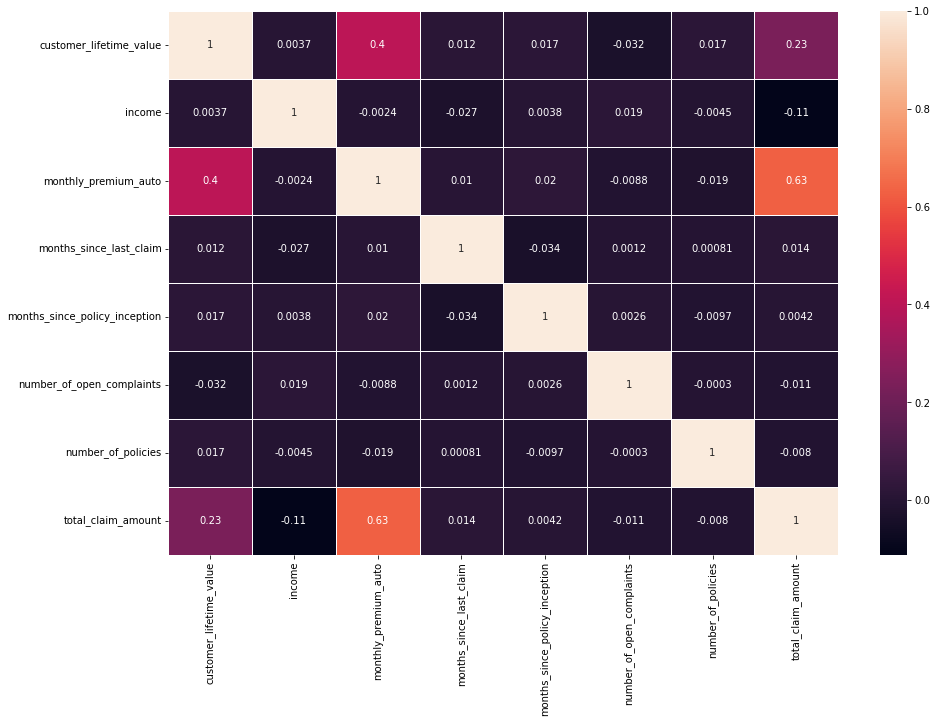

In [103]:
#Plot the Correlation Heatmap.

fig=plt.figure(figsize=(15,10))
sns.heatmap(df_numerical.corr(),annot=True, linewidth= 1)

In [136]:
df_categorical = df_marketing.select_dtypes(exclude=np.number)
df_categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [105]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

In [139]:
df_categorical_code = pd.get_dummies(df_categorical, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [107]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['region']= label_encoder.fit_transform(df['region'])
df['response']= label_encoder.fit_transform(df['response'])
df['coverage']= label_encoder.fit_transform(df['coverage'])
df['education']= label_encoder.fit_transform(df['education'])
df['month']= label_encoder.fit_transform(df['month'])
df['employment_status']= label_encoder.fit_transform(df['employment_status'])
df['gender']= label_encoder.fit_transform(df['gender'])
df['marital_status']= label_encoder.fit_transform(df['marital_status'])
df['policy_type']= label_encoder.fit_transform(df['policy_type'])
df['policy']= label_encoder.fit_transform(df['policy'])
df['renew_offer_type']= label_encoder.fit_transform(df['renew_offer_type'])
df['sales_channel']= label_encoder.fit_transform(df['sales_channel'])
df['vehicle_class']= label_encoder.fit_transform(df['vehicle_class'])
df['effective_to_date']= label_encoder.fit_transform(df['effective_to_date'])
df['location_code']= label_encoder.fit_transform(df['location_code'])

In [137]:
df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,Binary_Response
0,0,0,0,1,40,0,1,1,1,1,0,2,2,0,0,medsize,0
1,3,0,0,1,9,1,4,0,1,2,1,5,3,2,0,medsize,0
2,1,0,0,0,32,0,1,1,1,2,1,5,2,2,4,medsize,0
3,2,1,1,1,2,1,1,1,1,2,0,2,1,1,0,medsize,1
4,2,0,2,0,8,1,2,0,1,1,1,4,0,1,0,medsize,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,2,0,10,1,4,0,1,1,1,3,2,3,1,medsize,0
10685,2,0,0,1,27,1,1,0,2,1,1,5,1,1,0,medsize,0
10686,0,0,1,0,55,0,1,0,0,1,0,2,0,3,2,medsize,0
10687,3,0,2,1,35,0,1,0,2,0,1,3,0,1,4,medsize,0


In [140]:
df_categorical_code

,region_central,region_east,region_north west,region_west region,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,education_bachelor,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,1,1,...,1,0,1,0,0,0,0,0,1,0
10685,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10686,1,0,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
10687,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


(array([2.889e+03, 5.523e+03, 1.506e+03, 4.610e+02, 2.140e+02, 4.200e+01,
        3.200e+01, 1.500e+01, 5.000e+00, 2.000e+00]),
 array([   0. ,  289.3,  578.6,  867.9, 1157.2, 1446.5, 1735.8, 2025.1,
        2314.4, 2603.7, 2893. ]),
 <BarContainer object of 10 artists>)

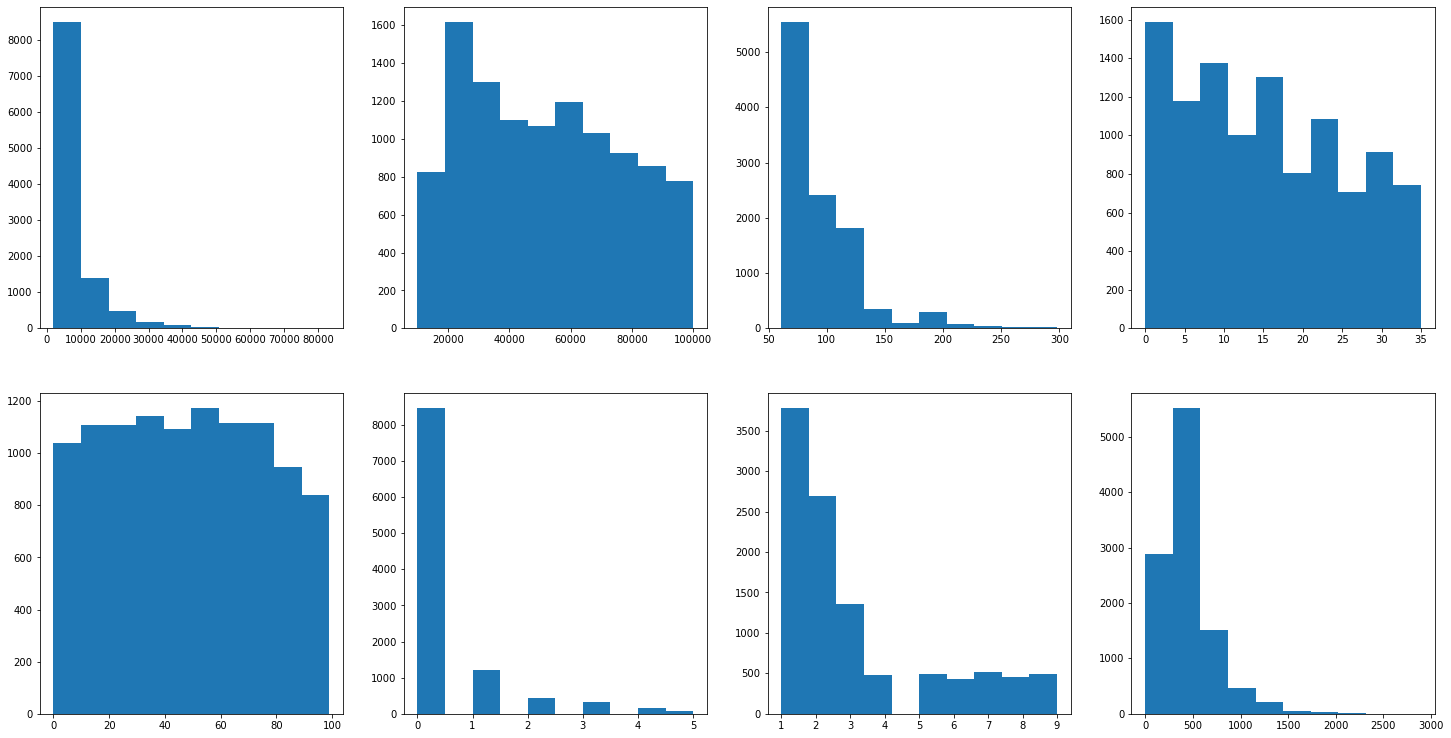

In [109]:
#distribution with hist()


fig3, axes3 = plt.subplots(2,4,figsize = (25,13))

# plot the hist chart
axes3[0,0].hist(df_numerical.customer_lifetime_value)
axes3[0,1].hist(df_numerical.income )
axes3[0,2].hist(df_numerical.monthly_premium_auto )
axes3[0,3].hist(df_numerical.months_since_last_claim )
axes3[1,0].hist(df_numerical.months_since_policy_inception )
axes3[1,1].hist(df_numerical.number_of_open_complaints )
axes3[1,2].hist(df_numerical.number_of_policies )
axes3[1,3].hist(df_numerical.total_claim_amount)

## varA = income
Use minmax transform to bring varA's values into the range [0,1].
Check that varA has been rescaled using a distplot or a histagram

In [110]:
from sklearn.preprocessing import MinMaxScaler

x = df_numerical['income'].values.reshape(-1,1)

scaler = MinMaxScaler()
print(scaler.fit(df_numerical))

MinMaxScaler()


In [111]:
df_numerical['income']

0        48029
1        92260
2        22139
3        49078
4        23675
         ...  
10684    61541
10685    61146
10686    39837
10687    64195
10688    68942
Name: income, Length: 10689, dtype: int64


## varB = customer_lifetime_value
Use StandardScalar or PowerTransform to reduce the skew and standardize varB's distribution.
Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

customer_lifetime_value
monthly_premium_auto
total_claim_amount

## PowerTransformer() ⚠️ 

In [206]:
from sklearn.compose import ColumnTransformer

In [209]:
df_categorical.columns

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [210]:
df_numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [214]:
cols_to_hot_encode = ['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size']

cols_to_standardize = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']

In [218]:
>>> from sklearn.preprocessing import OneHotEncoder


transformer = ColumnTransformer([
    ('standardize', StandardScaler(), cols_to_standardize),
    ('encode', OneHotEncoder(), cols_to_hot_encode)
], remainder = 'passthrough', verbose_feature_names_out=True)

transformer.fit(X_train)


ValueError: A given column is not a column of the dataframe

# Day 2. Predictive Modeling

## X Y split

In [217]:
X=df_numerical.drop('total_claim_amount', axis=1)
y=df_numerical.total_claim_amount


In [205]:
X=X._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


### Data Splitting


In [117]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

### Standardize


In [118]:

std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [119]:
X_train.shape


(7482, 7)

In [120]:
X_test_scaled=std_scaler.transform(X_test)

In [121]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ...  1.36516733 -0.42500069
  -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 ...  1.68786198 -0.42500069
   0.84759702]
 [-0.5223013   0.26592193  0.48489091 ...  0.50464827 -0.42500069
  -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -1.39566466 -0.42500069
  -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115 ... -1.61079442 -0.42500069
  -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532 ...  0.21780858  1.78399907
  -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178 ...  1.54444214 -0.42500069
   2.51614162]
 [-0.7597249  -0.93947257 -0.64253    ...  0.755633    0.67949919
  -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 ...  0.39708339 -0.42500069
  -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -1.18053489 -0.42500069
  -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938 ... -1.61079442  0.67949919
   0.43046087]
 [-0.49881985 -0.95695203  0.71615674 ... -1.00126009 -0.42500069
  -0.82094758]]


# Apply Linear Regression
## Modeling using Statsmodels

In [122]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     742.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:01:57   Log-Likelihood:                -51168.
No. Observations:                7482   AIC:                         1.024e+05
Df Residuals:                    7474   BIC:                         1.024e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.612    165.770      0.0

## Modeling using Scikit Learn
### Model fitting


In [124]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [125]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6608,7271,20545,70,23,86,0,2
5697,5079,70474,68,6,95,0,5
10524,4428,58577,110,6,62,0,1
397,22332,49078,97,10,3,0,2
6324,2430,26182,70,29,30,0,1
...,...,...,...,...,...,...,...
9785,3086,73938,76,34,48,0,1
7763,5658,78834,72,14,20,2,8
5218,2434,23033,62,5,9,0,1
1346,23594,76358,66,25,3,0,2


In [132]:
y_train

6608     336
5697     326
10524    303
397      484
6324     341
        ... 
9785      53
7763     345
5218     500
1346      86
3582     680
Name: total_claim_amount, Length: 7482, dtype: int64

In [127]:
model.coef_

array([ -6.5986299 , -33.18126217, 187.80190938,   1.90598135,
        -0.91148552,   1.71705592,  -2.32015745])

In [128]:
model.intercept_


433.0597433841219

### Making prediction


In [130]:

y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [131]:
y_pred

array([260.52304948, 353.76752657, 297.68091412, ..., 367.57334203,
       317.67903438, 608.06079373])

In [133]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

# Day 3.  Predicting on new data


In [188]:
np.array(np.array(new_data).reshape(-1,7)).shape


(1, 7)

In [189]:
new_data = np.array([0, 1, 0, 0, 0, 1, 0]).reshape(-1,7)

#1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0


In [176]:
new_data_scaled=std_scaler.transform(new_data)

/Users/saori/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [190]:
model.predict(new_data_scaled)

array([7.1839498])

## Evaluating Model Performance


In [191]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

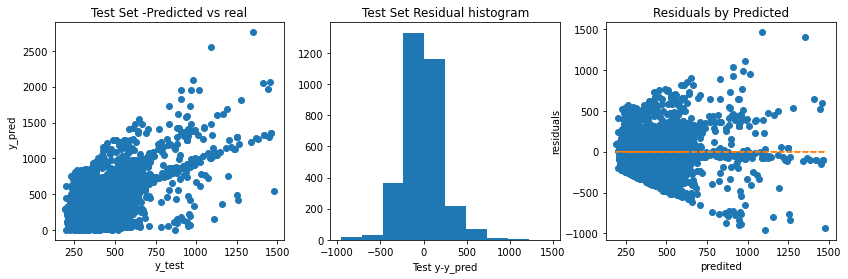

In [179]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

### more fancy using seaborn


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

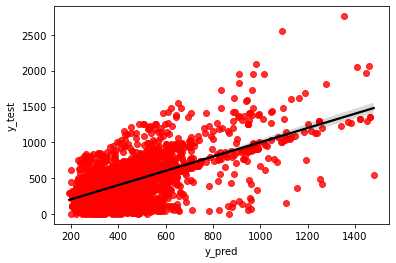

In [180]:

sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Error metrics


In [193]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

49433.00247202497
152.02992302782081


In [194]:
##prediction on the train set
mse(y_train,y_pred_train)

51007.93558508785

In [196]:
from sklearn.metrics import r2_score

R2=r2_score(y_test,y_pred)
R2

0.40738490678489503

In [197]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [198]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.40608815603387727

### getting the number of parameters


In [199]:
X_test.shape[1]

7

### Feature Importance


In [200]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [201]:
features_importances


,Attribute,Importance
2,monthly_premium_auto,187.801909
1,income,33.181262
0,customer_lifetime_value,6.598630
6,number_of_policies,2.320157
3,months_since_last_claim,1.905981
5,number_of_open_complaints,1.717056
4,months_since_policy_inception,0.911486


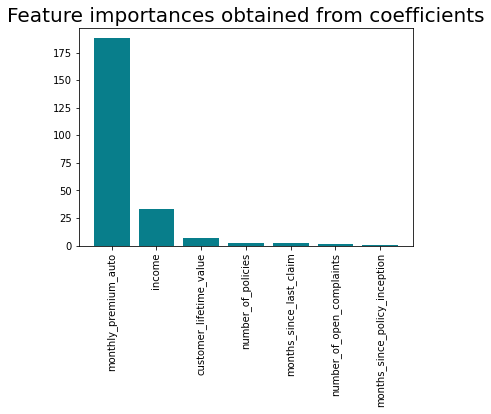

In [202]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Write a csv
With to_csv


In [220]:
#Data/Data_Marketing_Customer_Analysis_Round3

df_marketing = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')


df_marketing


,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize
